# Data Cleaning

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [62]:
path = '/Users/SarthakPratik/Downloads/ARIMA-And-Seasonal-ARIMA-master/perrin-freres-monthly-champagne-.csv'
df = pd.read_csv(path)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [63]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [64]:
df.dropna()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [65]:
df.columns=["Month","Sales"]

In [66]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [67]:
df.drop(105,axis=0,inplace=True)
df.drop(106,axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [68]:
df['Month'] = pd.to_datetime(df['Month'])
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [70]:
df.set_index('Month',inplace=True)
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


In [71]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Plotting Data for Visual Analysis

<AxesSubplot:xlabel='Month'>

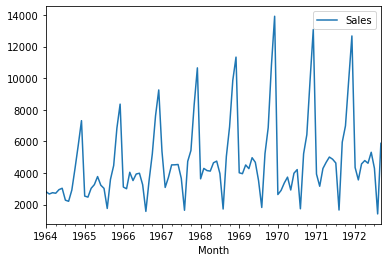

In [72]:
df.plot()

# Stationarity Check

In [75]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df,autolag = 'AIC')

print('1. ADF :',dftest[0])
print('2. P-Value :',dftest[1])
print('3. No. of Lags :',dftest[2])
print('4. Number of Observations used for ADF Regression and Crtitical Value Calculation :',dftest[3])
print('5. Critical Values :',)
for key, val in dftest[4].items():
    print("\t",key,": ",val)

1. ADF : -1.8335930563276228
2. P-Value : 0.363915771660245
3. No. of Lags : 11
4. Number of Observations used for ADF Regression and Crtitical Value Calculation : 93
5. Critical Values :
	 1% :  -3.502704609582561
	 5% :  -2.8931578098779522
	 10% :  -2.583636712914788


# Differencing

In [76]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [77]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [78]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [79]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


# Stationarity Check for differenced Dataset

In [80]:
dftest = adfuller(df['Seasonal First Difference'].dropna(),autolag = 'AIC')

print('1. ADF :',dftest[0])
print('2. P-Value :',dftest[1])
print('3. No. of Lags :',dftest[2])
print('4. Number of Observations used for ADF Regression and Crtitical Value Calculation :',dftest[3])
print('5. Critical Values :',)
for key, val in dftest[4].items():
    print("\t",key,": ",val)

1. ADF : -7.626619157213164
2. P-Value : 2.060579696813685e-11
3. No. of Lags : 0
4. Number of Observations used for ADF Regression and Crtitical Value Calculation : 92
5. Critical Values :
	 1% :  -3.503514579651927
	 5% :  -2.893507960466837
	 10% :  -2.583823615311909


<AxesSubplot:xlabel='Month'>

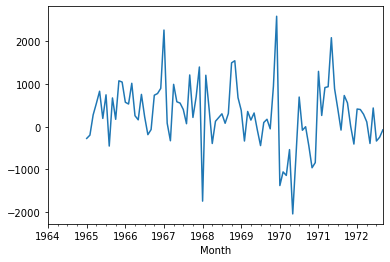

In [81]:
df['Seasonal First Difference'].plot()

# Finding the best model


Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

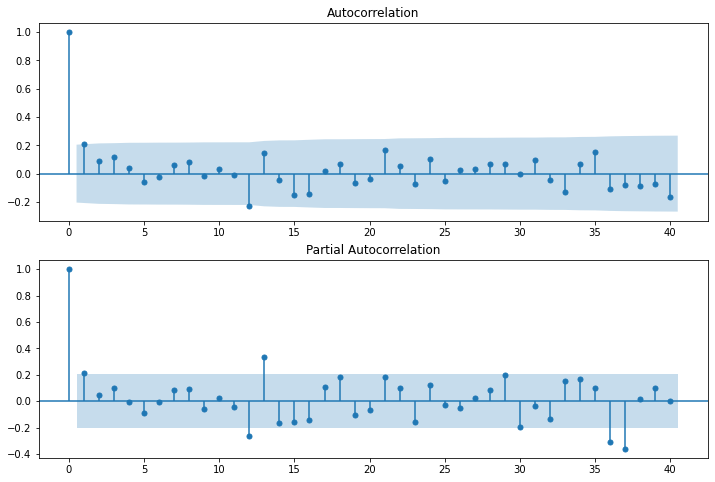

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

OR

In [87]:
from pmdarima import auto_arima


In [90]:
stepwise_fit = auto_arima(df['Seasonal First Difference'].dropna(),trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1500.884, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1498.453, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1498.864, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1511.271, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1500.270, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1500.341, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1502.216, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1503.527, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.653 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -746.227
Date:                Fri, 25 Dec 2020   AIC                           1498.453
Time:                        11:40:33   BIC                           1506.051
Sample:                             0   HQIC                          1501.521
                                 - 93                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    228.9560     83.776      2.733      0.006      64.758     393.154
ar.L1          0.2125      0.072      2.964      0.003       0.072       0.353
sigma2      5.481e+05   6.04e+04      9.068      0.000     4.3e+05    6.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.16
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Modelling Up 

with SARIMA as it has Stationarity

In [102]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 0, 0),seasonal_order=(1,0,0,12))
results=model.fit()

<AxesSubplot:xlabel='Month'>

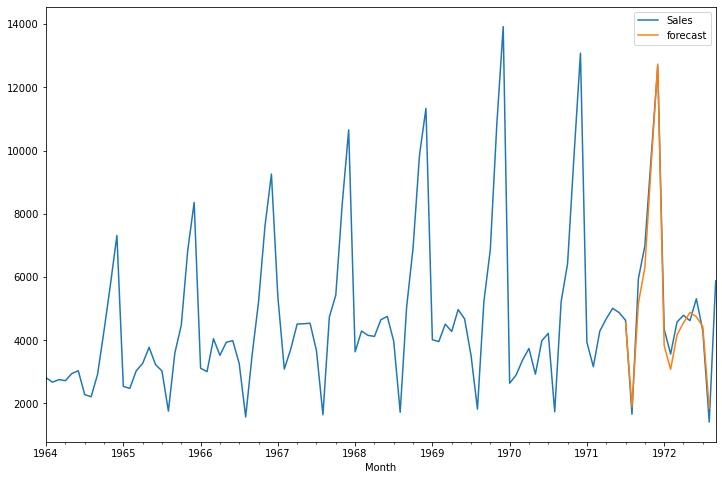

In [103]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

# Future Predictions

In [104]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [105]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [106]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [107]:
future_df=pd.concat([df,future_datest_df])
future_df

,Sales,Sales First Difference,Seasonal First Difference,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

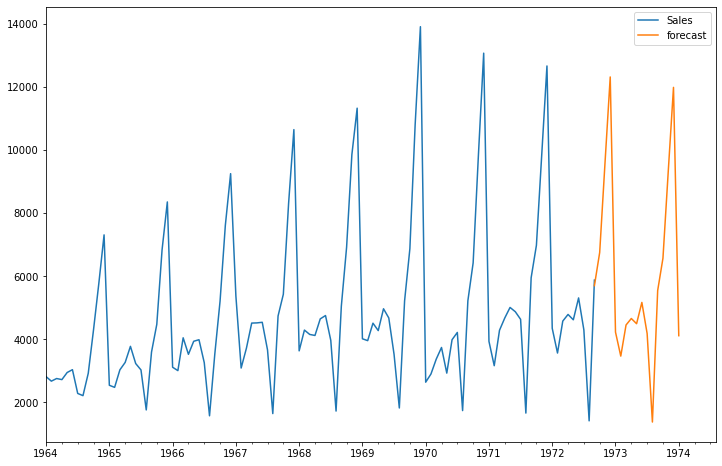

In [108]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))